# Test of neural network on MNIST dataset
By: Magnus Kvåle Helliesen

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neural_network import NeuralNetwork
from random import choices
import pickle
from pathlib import Path

## Setting up a small neural network with one hidden layer
NeuralNetwork class can be found in [neural_network.py](neural_network/neural_network.py).

In [2]:
# We set up a neural network with one hidden layers
nn = NeuralNetwork(784, 1000, 1, 10)
nn

NeuralNetwork(784, 1000, 1, 10)

## Importing MNIST dataset

I got the data from [https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/](https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/).

In [3]:
# Importing data from csv
df_train = pd.read_csv(Path('../mnist_data/mnist_train.csv'), sep=',', header=None)
df_test = pd.read_csv(Path('../mnist_data/mnist_test.csv'), sep=',', header=None)

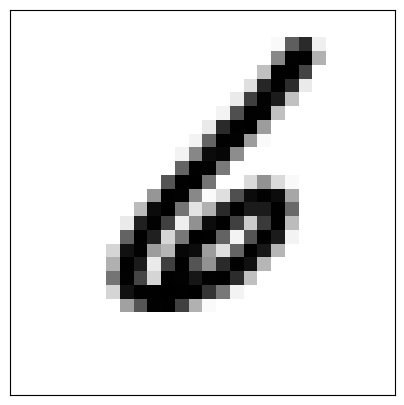

In [4]:
# Plotting some random number, turns out to be a 6
plt.figure(figsize=(5, 5))
plt.imshow((255-df_train.loc[999, 1:]).to_numpy().reshape((28, 28)), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

## A bit of data wrangling

In [5]:
# Storing the train and test data as a lists of tuples (slightly inefficient, but anyways...)
data_train = tuple()
for _, series in df_train.iterrows():
    array = series.loc[1:].to_numpy()
    array = (array-array.mean())/array.std()
    data_train += tuple([array, 1*np.array([series.loc[0] == i for i in range(10)])]),

data_test = tuple()
for _, series in df_test.iterrows():
    array = series.loc[1:].to_numpy()
    array = (array-array.mean())/array.std()
    data_test += tuple([array, 1*np.array([series.loc[0] == i for i in range(10)])]),

## Making predictions without training

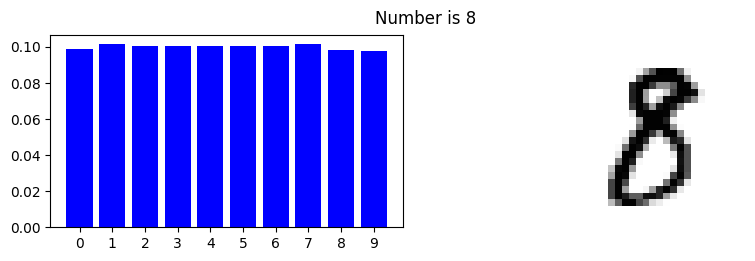

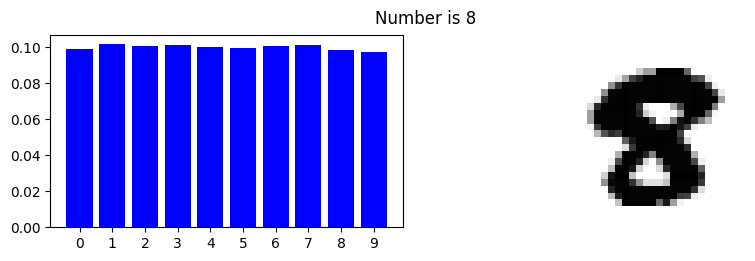

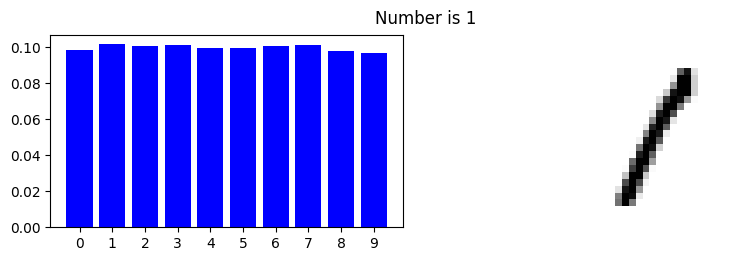

In [6]:
# Obiously it does not know how to categorise digits
for random_data in choices(data_test, k=3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2.5))
    ax1.bar(height=nn.predict(random_data[0]), x=[f'{i}' for i in range(10)], color='b')
    ax2.imshow((255-random_data[0]).reshape((28, 28)), cmap='gray')
    ax2.set_axis_off()
    fig.suptitle(f'Number is {sum(i*x for i, x in enumerate(random_data[1]))}')

## Training the network

In [7]:
# Learning from stochastic gradient descent
nn.train(data_train, 200000, 0.001)

## Making predictions after training (out of sample)

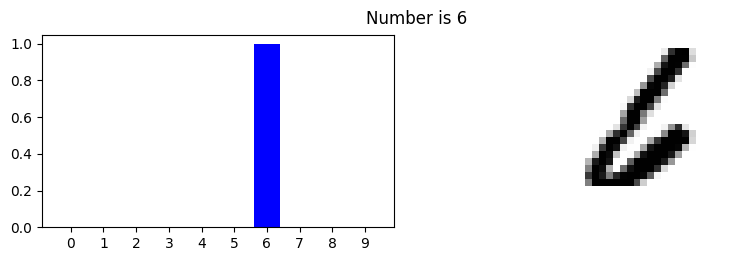

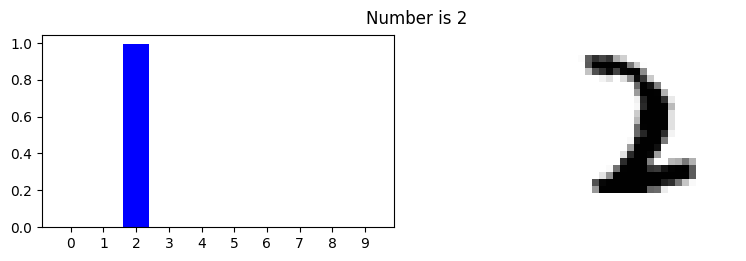

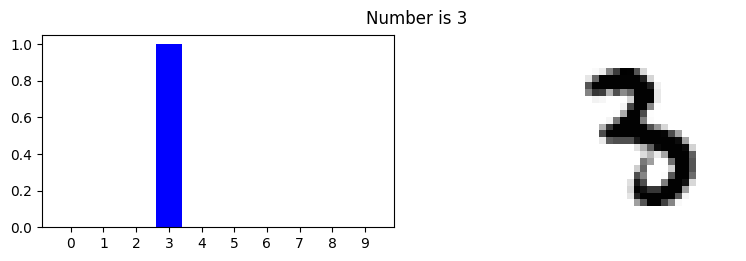

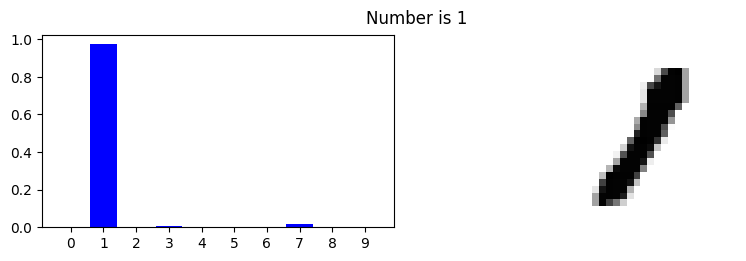

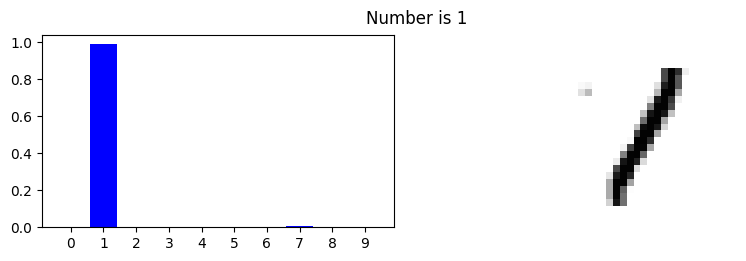

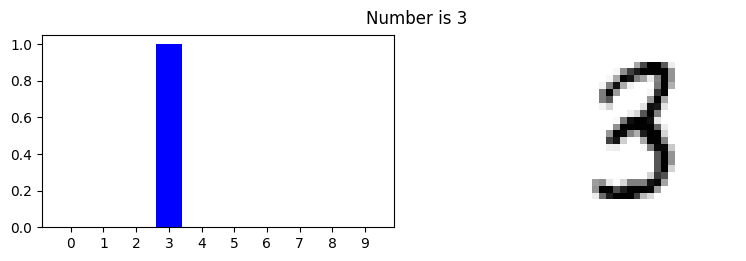

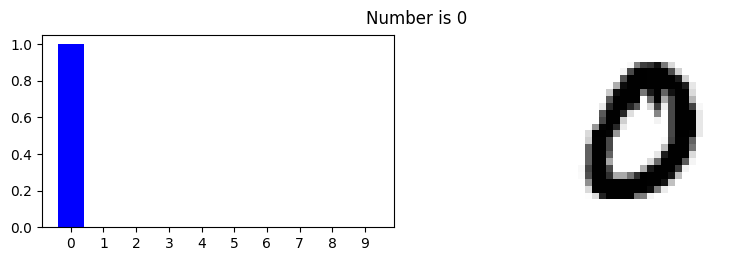

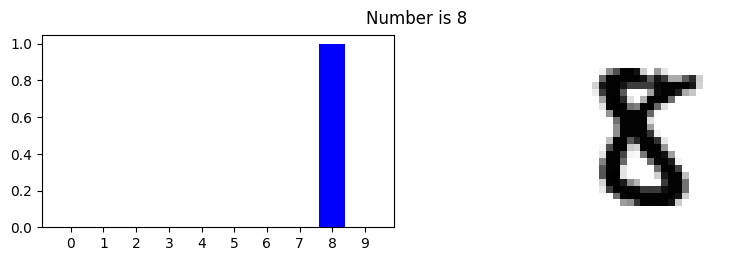

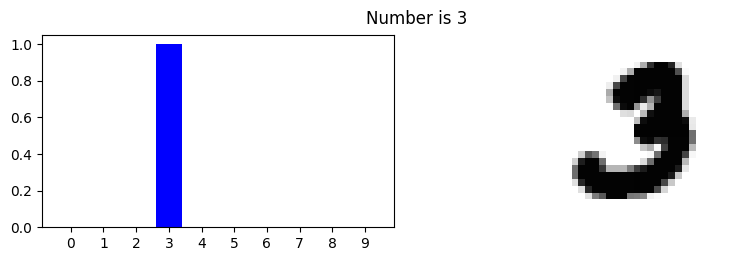

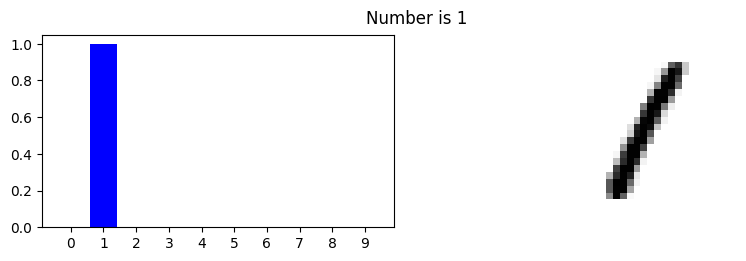

In [8]:
# It's actually working!
for random_data in choices(data_test, k=10):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2.5))
    ax1.bar(height=nn.predict(random_data[0]), x=[f'{i}' for i in range(10)], color='b')
    ax2.imshow((255-random_data[0]).reshape((28, 28)), cmap='gray')
    ax2.set_axis_off()
    fig.suptitle(f'Number is {sum(i*x for i, x in enumerate(random_data[1]))}')

## Looking at heatmaps of weights

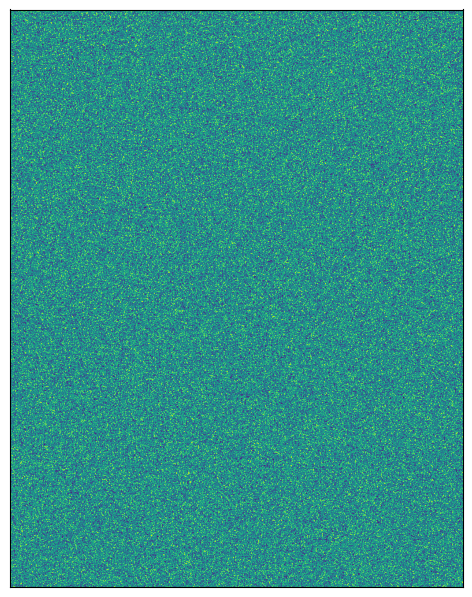

In [9]:
# Heatmap of weights between hidden layer before training
plt.figure(figsize=(7.5, 7.5))
plt.imshow(nn.weights0[0])
plt.xticks([])
plt.yticks([])
plt.show()

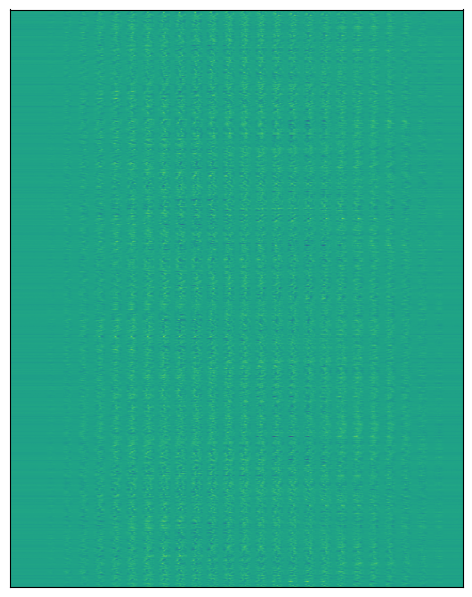

In [10]:
# Heatmap of weights after training. A lot has happened
plt.figure(figsize=(7.5, 7.5))
plt.imshow(nn.weights[0])
plt.xticks([])
plt.yticks([])
plt.show()

## Storing neural network instance

In [11]:
with open('nn.pickle', 'wb') as f:
    pickle.dump(nn, f)